In [1]:
%matplotlib inline
save_directory = '../../../thesis/kid/'
save = True

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.analysis.timeseries import decimating_fir

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')

In [4]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [5]:
num_channels = 7
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

In [6]:
downsample = 32
all_sss[0].stream.stream_sample_rate / downsample

976.5625

In [7]:
fir = decimating_fir.DecimatingFIR(downsample_factor=downsample)

/home/flanigan/readout/kid_readout/kid_readout/analysis/timeseries/fftfilt.py:144: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i:k,:] = y[i:k,:] + yt[:k-i,:]            # and add


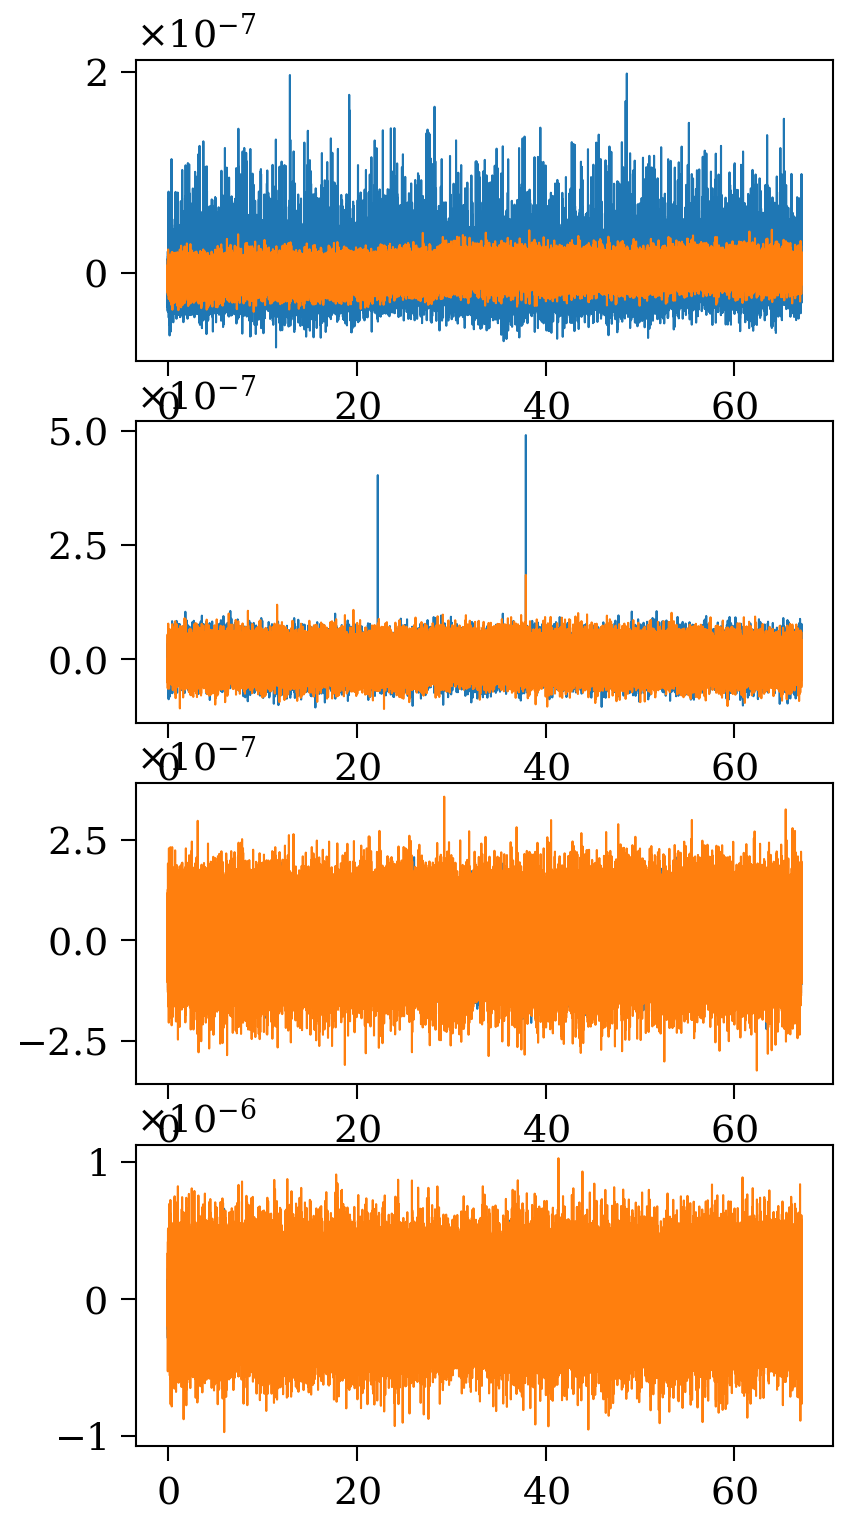

In [8]:
lo_index = 0
fig, axes = plt.subplots(4, 1, figsize=(3, 6))
for n, ax in enumerate(axes.flatten()):
    sss = sss_dict[lo_index][n]
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.x_raw - sss.x_raw.mean()).real)
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.q_raw - sss.q_raw.mean()).real)

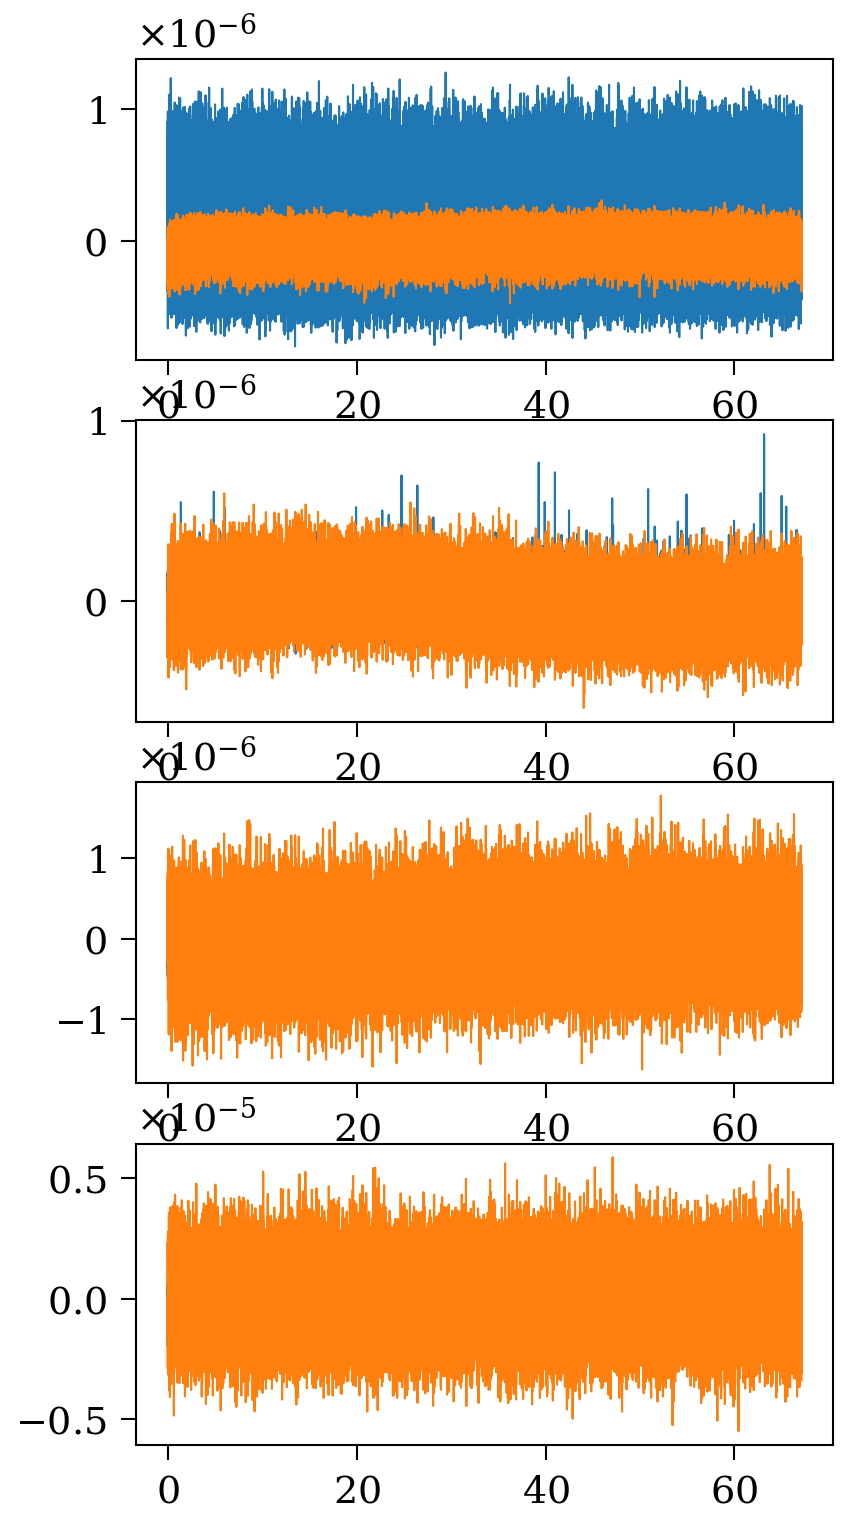

In [9]:
lo_index = 1
fig, axes = plt.subplots(4, 1, figsize=(3, 6))
for n, ax in enumerate(axes.flatten()):
    sss = sss_dict[lo_index][n]
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.x_raw - sss.x_raw.mean()).real)
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.q_raw - sss.q_raw.mean()).real)

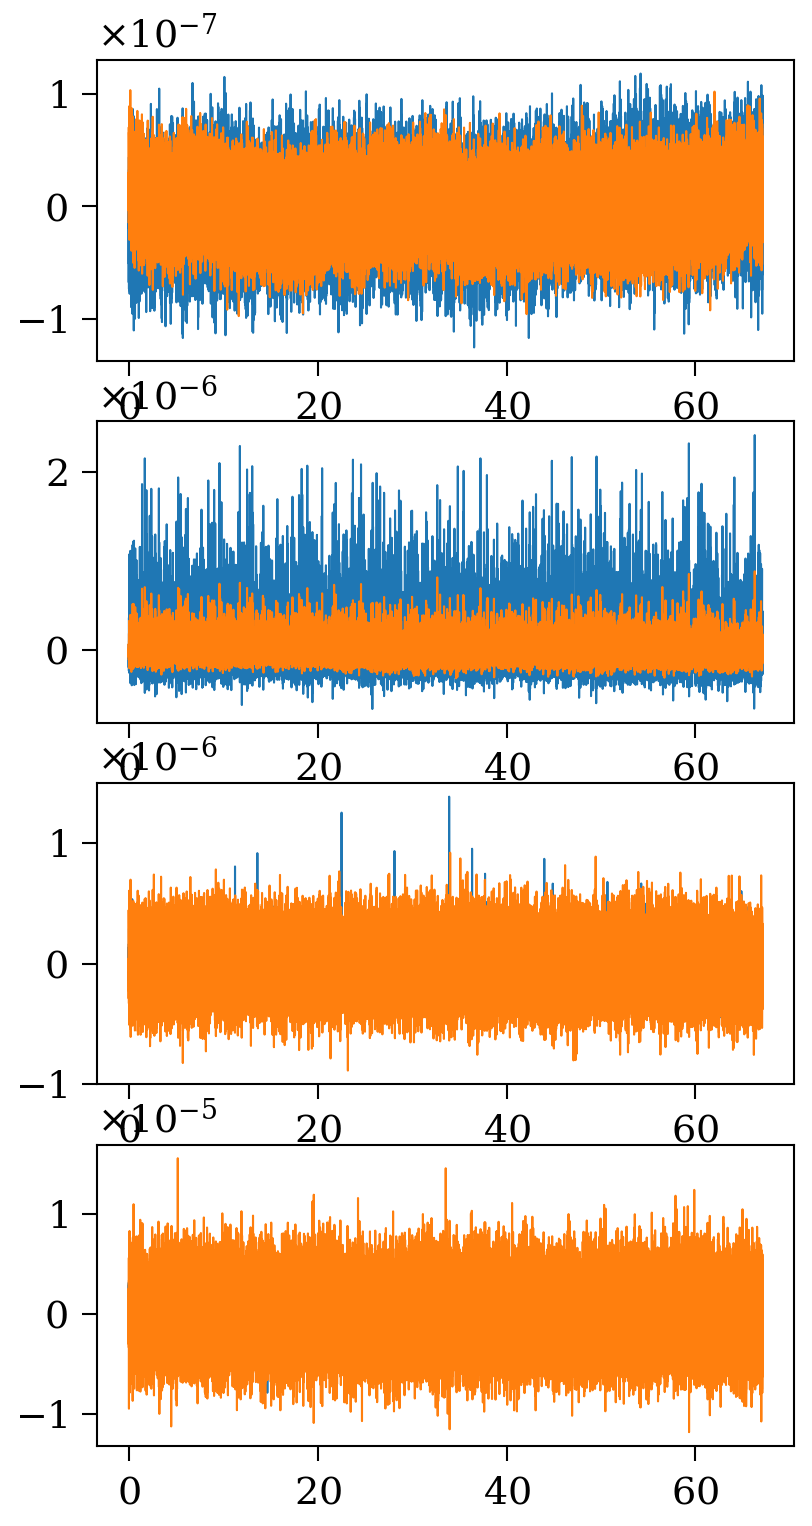

In [10]:
lo_index = 2
fig, axes = plt.subplots(4, 1, figsize=(3, 6))
for n, ax in enumerate(axes.flatten()):
    sss = sss_dict[lo_index][n]
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.x_raw - sss.x_raw.mean()).real)
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.q_raw - sss.q_raw.mean()).real)

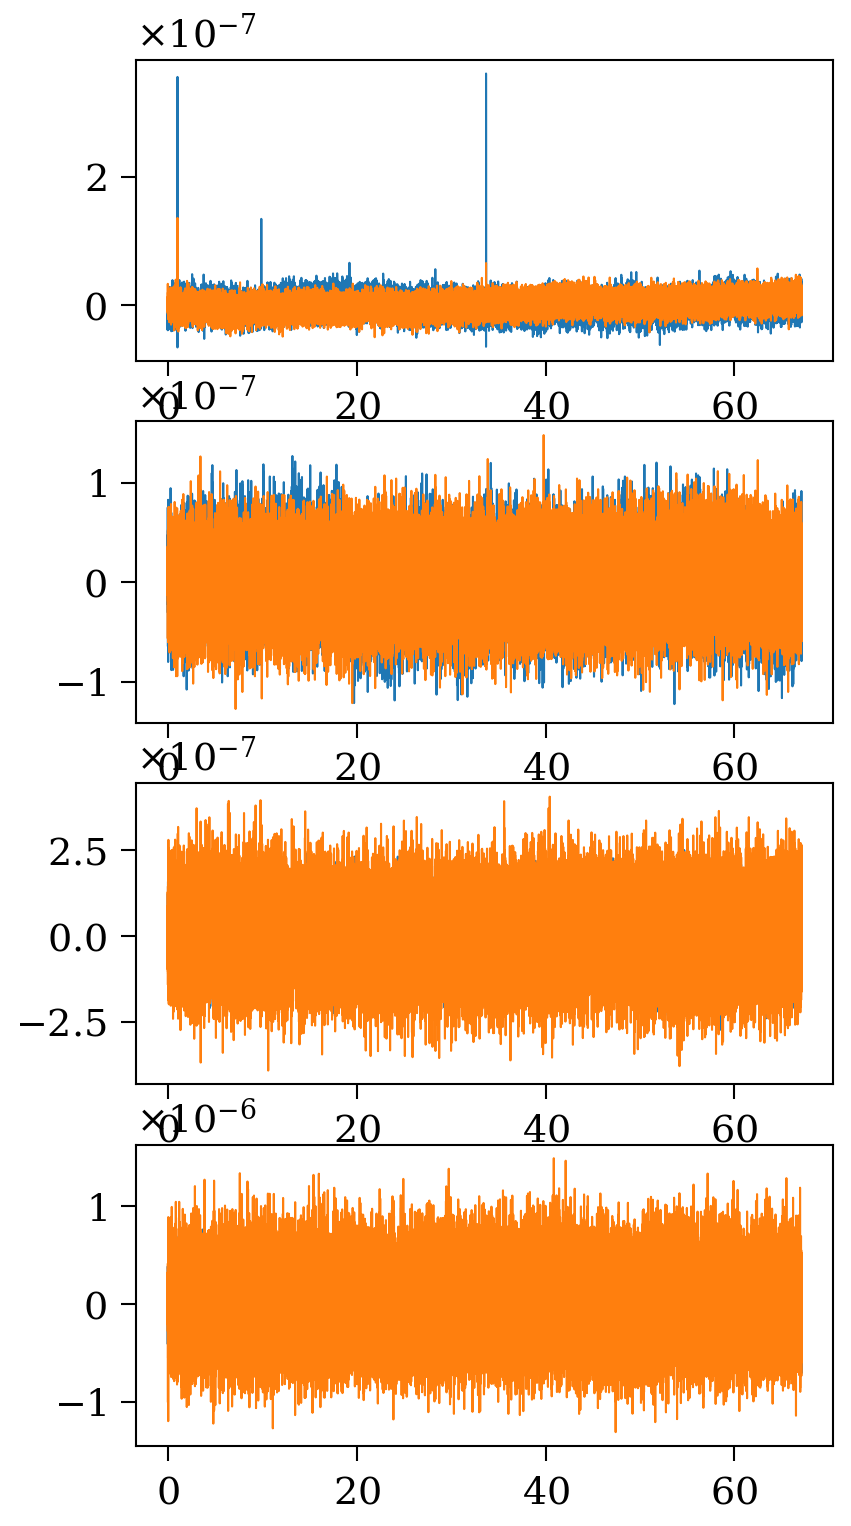

In [11]:
lo_index = 3
fig, axes = plt.subplots(4, 1, figsize=(3, 6))
for n, ax in enumerate(axes.flatten()):
    sss = sss_dict[lo_index][n]
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.x_raw - sss.x_raw.mean()).real)
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.q_raw - sss.q_raw.mean()).real)

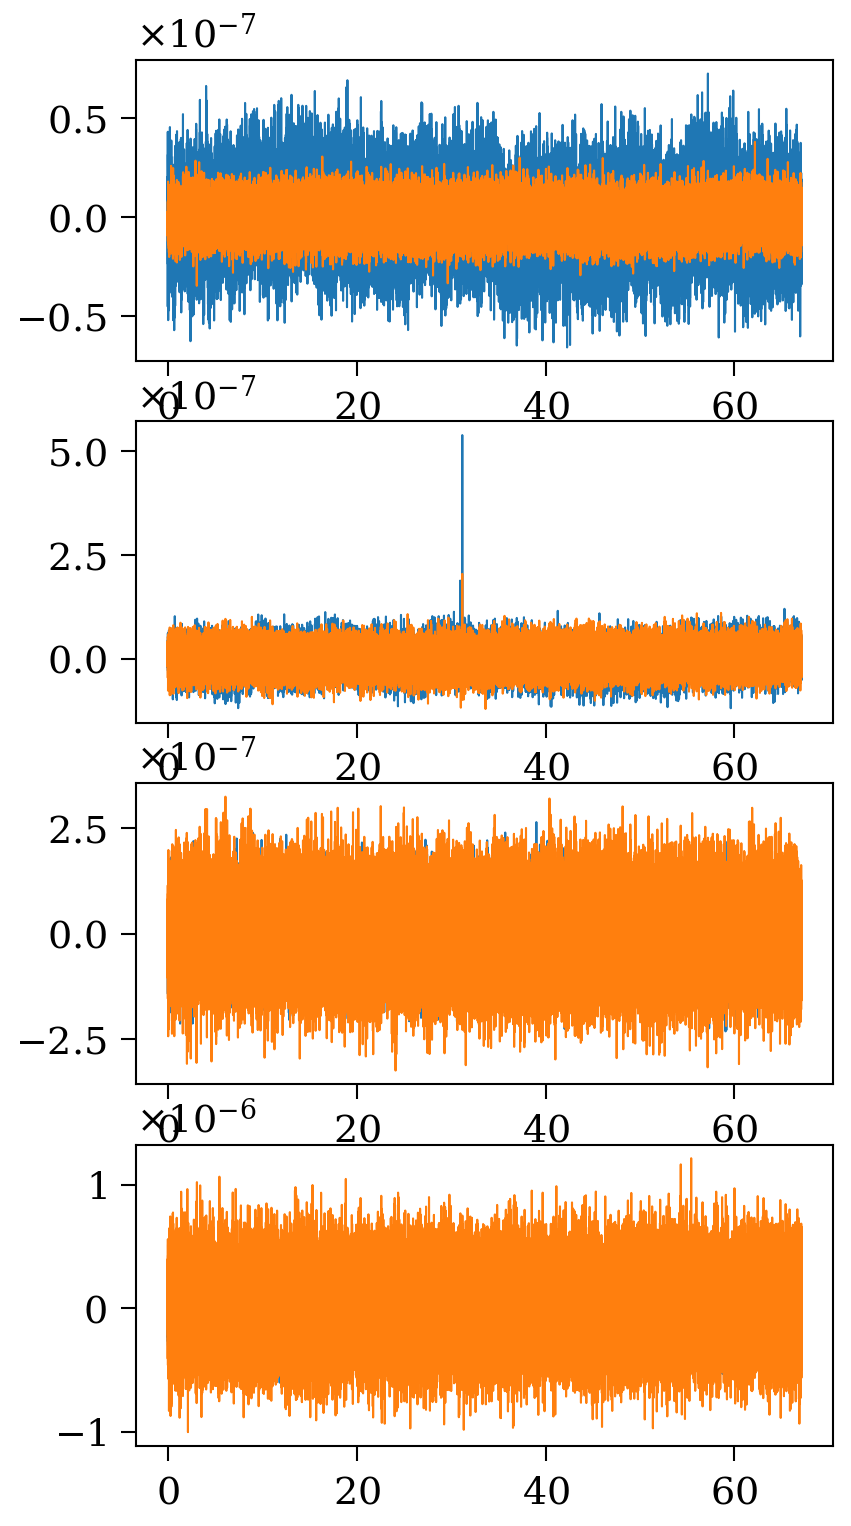

In [12]:
lo_index = 4
fig, axes = plt.subplots(4, 1, figsize=(3, 6))
for n, ax in enumerate(axes.flatten()):
    sss = sss_dict[lo_index][n]
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.x_raw - sss.x_raw.mean()).real)
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.q_raw - sss.q_raw.mean()).real)

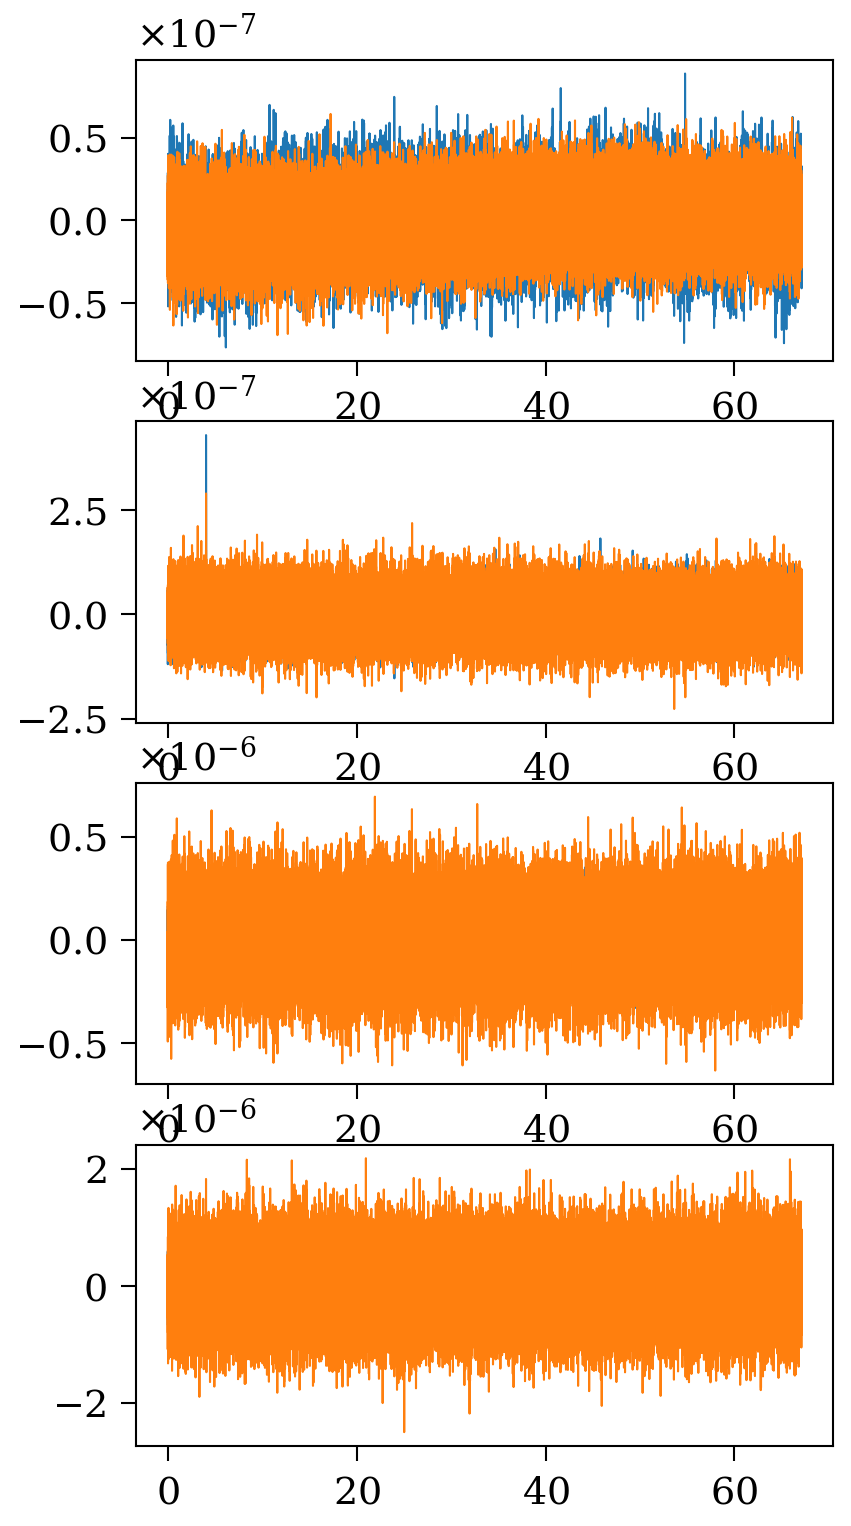

In [13]:
lo_index = 5
fig, axes = plt.subplots(4, 1, figsize=(3, 6))
for n, ax in enumerate(axes.flatten()):
    sss = sss_dict[lo_index][n]
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.x_raw - sss.x_raw.mean()).real)
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.q_raw - sss.q_raw.mean()).real)

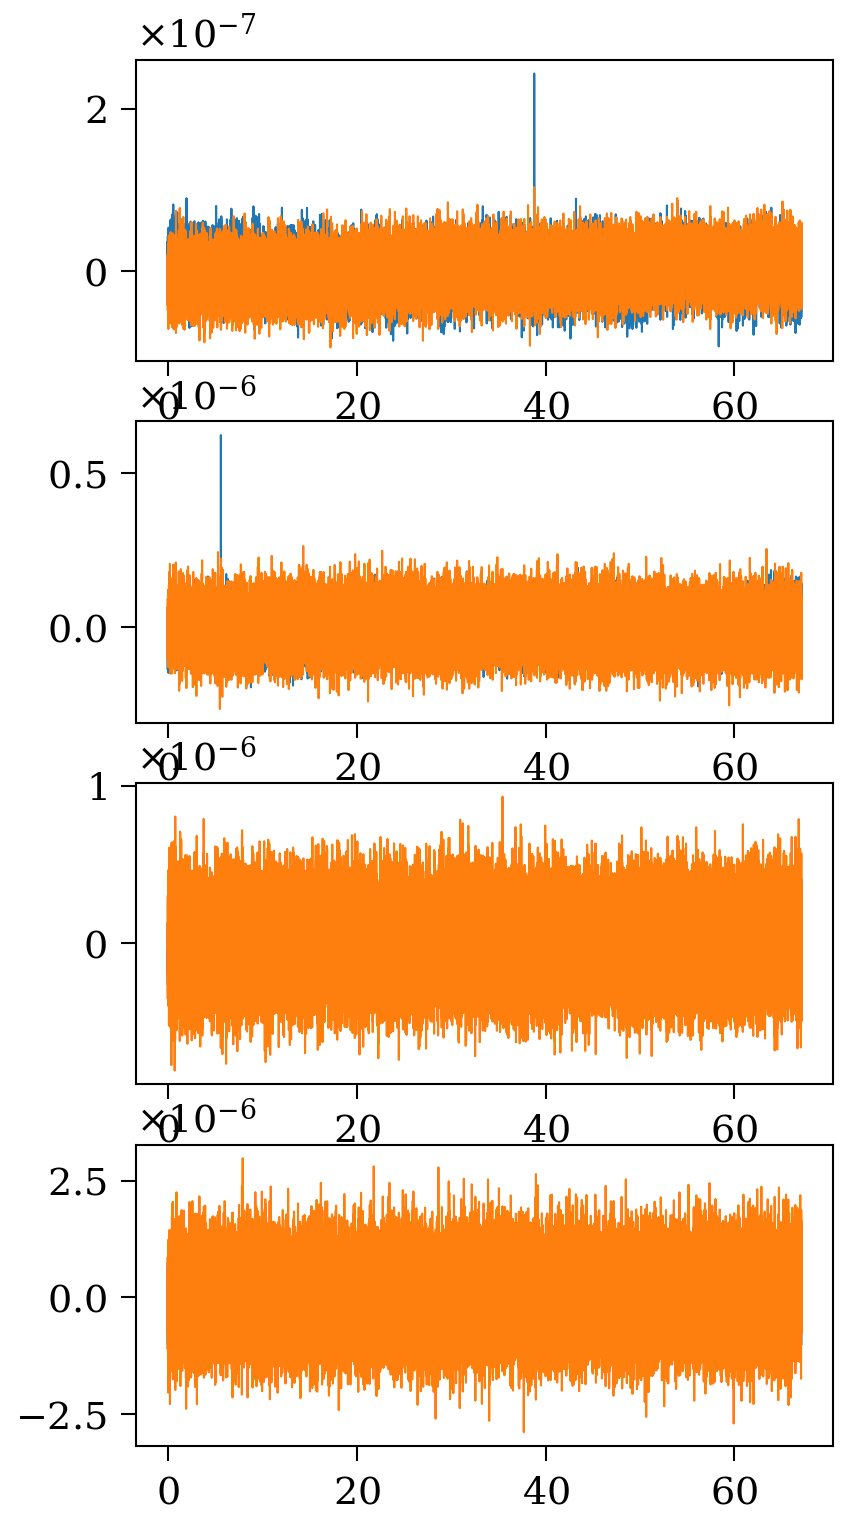

In [14]:
lo_index = 6
fig, axes = plt.subplots(4, 1, figsize=(3, 6))
for n, ax in enumerate(axes.flatten()):
    sss = sss_dict[lo_index][n]
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.x_raw - sss.x_raw.mean()).real)
    ax.plot(sss.stream.sample_time[::downsample],
            fir.process(sss.q_raw - sss.q_raw.mean()).real)

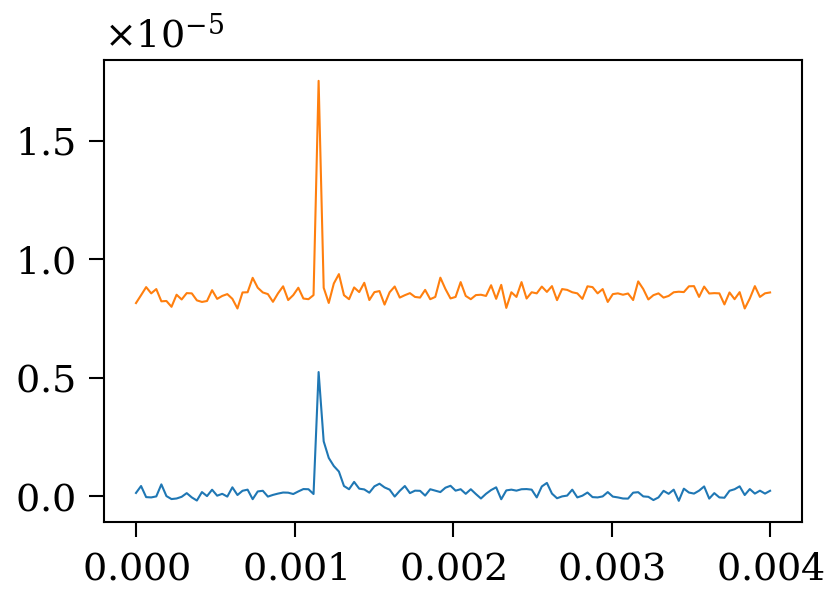

In [22]:
sss = sss_dict[5][1]
sss = sss.epochs(sss.stream.epoch + 4.056, sss.stream.epoch + 4.06)
fig, ax = plt.subplots()
ax.plot(sss.stream.sample_time,
        sss.x_raw)
ax.plot(sss.stream.sample_time,
        sss.q_raw)

(-0.6, 0.6)

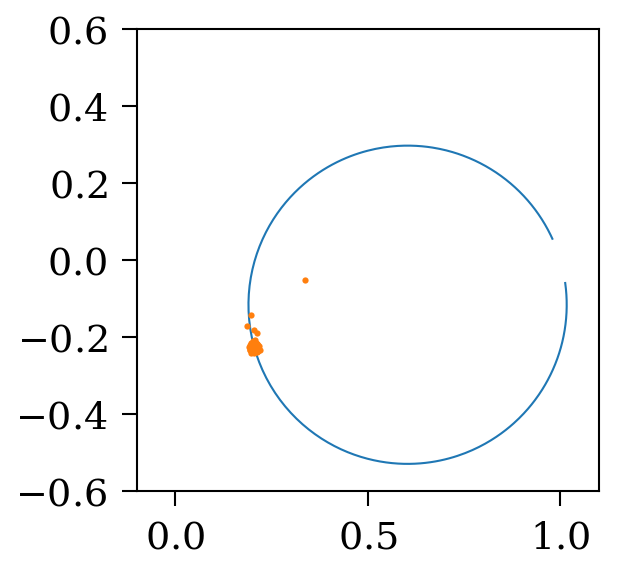

In [26]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
rd = sss.resonator.extract(normalize=True)
ax.plot(rd.s21_model.real, rd.s21_model.imag)
s21 = sss.resonator.remove_background(frequency=sss.stream.frequency, s21_raw = sss.stream.s21_raw)
ax.plot(s21.real, s21.imag, '.')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.6, 0.6)

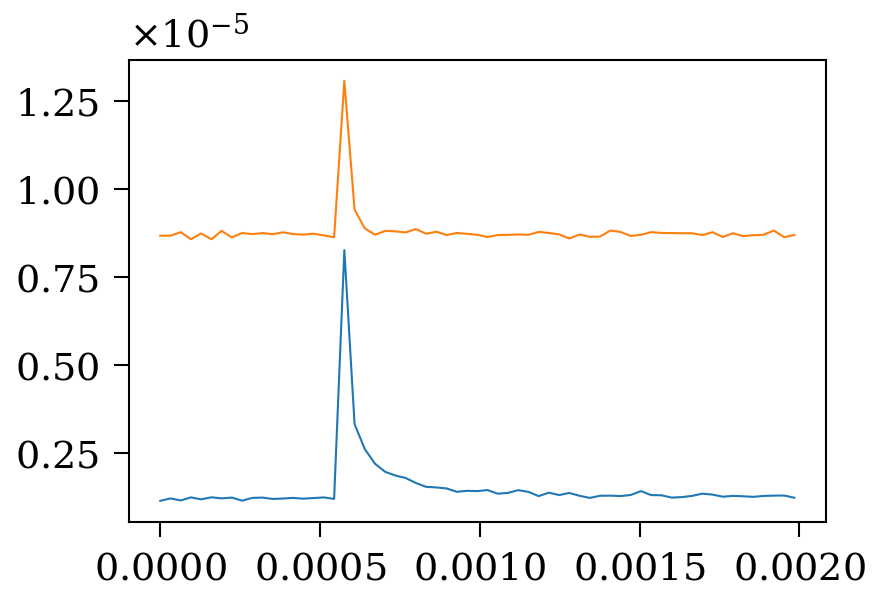

In [32]:
sss = sss_dict[3][0]
sss = sss.epochs(sss.stream.epoch + 1.034, sss.stream.epoch + 1.036)
fig, ax = plt.subplots()
ax.plot(sss.stream.sample_time,
        sss.x_raw)
ax.plot(sss.stream.sample_time,
        sss.q_raw)

(-0.3, 0.3)

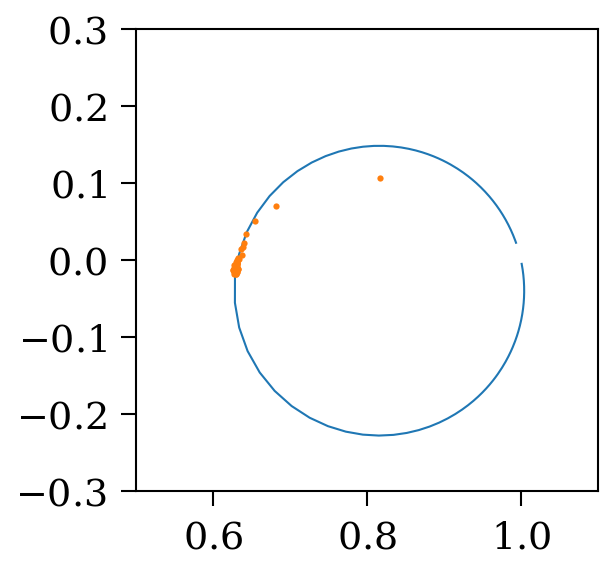

In [34]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
rd = sss.resonator.extract(normalize=True)
ax.plot(rd.s21_model.real, rd.s21_model.imag)
s21 = sss.resonator.remove_background(frequency=sss.stream.frequency, s21_raw = sss.stream.s21_raw)
ax.plot(s21.real, s21.imag, '.')
ax.set_xlim(0.5, 1.1)
ax.set_ylim(-0.3, 0.3)